In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
df=pd.read_csv('games.csv')

print(df.head())
print(df.info())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

2. Preparacion de los datos

In [3]:
df.columns=df.columns.str.lower() #Nombres de las columnas en minusculas.
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [4]:
df.dropna(inplace=True) #Se eliminaron los valores NaN

df['year_of_release'] = df['year_of_release'].astype(int) #se cambia el año por valores enteros
df['critic_score'] = df['critic_score'].astype(int) #se cambia el año por valores enteros

#Para los valores TBD
print(df['user_score'].unique())
#Para los calulos se eliminan las filas que continen la palabra tbd
df = df[~df['user_score'].str.contains('tbd')]
#Ademas se cambian el tipo de datos de object a float
df['user_score'] = df['user_score'].astype(float)

print(df.info())

['8' '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9' '8.1'
 '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6' '7.2'
 '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4' '6.8'
 '6.1' '6.7' '5.4' '4' '9.3' '6.2' '4.2' '6' 'tbd' '4.9' '3.7' '4.1' '5.8'
 '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.5' '5.1'
 '3.5' '2.5' '1.9' '2.2' '2' '9.5' '4.7' '2.1' '3.6' '1.8' '3.8' '3' '9.6'
 '2.8' '1.7' '2.7' '2.4' '1.5' '1.2' '2.3' '0.5' '0.6' '0.9' '1' '1.4'
 '1.3' '0.7']
<class 'pandas.core.frame.DataFrame'>
Index: 6826 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6826 non-null   object 
 1   platform         6826 non-null   object 
 2   year_of_release  6826 non-null   int32  
 3   genre            6826 non-null   object 
 4   na_sales         6826 non-null   float64
 5   eu_sales         6826 non-null   float6

**Calculo de las ventas totales (la suma de las ventas en todas las regiones) para cada juego**

In [5]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
print(df.head())

                    name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45            76         8.0      E   
2     12.76      3.79         3.29            82         8.3      E   
3     10.93      3.28         2.95            80         8.0      E   
6      9.14      6.50         2.88            89         8.5      E   
7      9.18      2.93         2.84            58         6.6      E   

   total_sales  
0        82.54  
2        35.52  
3        32.77  
6        29.80  
7        28.91  


Cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

year_of_release
1985      1
1988      1
1992      1
1994      1
1996      7
1997     13
1998     25
1999     30
2000    102
2001    256
2002    455
2003    498
2004    476
2005    562
2006    528
2007    590
2008    592
2009    550
2010    429
2011    454
2012    313
2013    266
2014    253
2015    211
2016    212
Name: count, dtype: int64


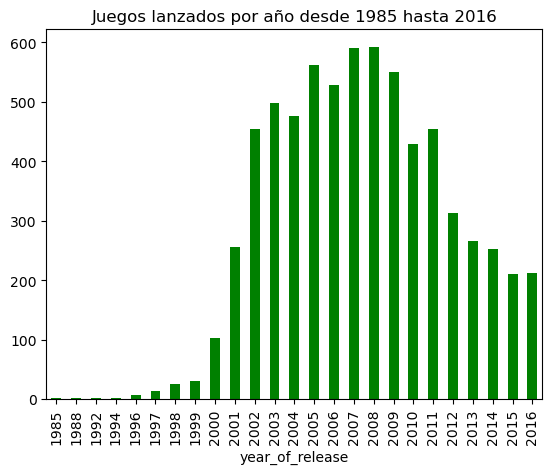

In [6]:
year_max=df['year_of_release'].max() #Datos de los años maximos
year_min=df['year_of_release'].min() #Datos de los años minimos

games_year=df['year_of_release'].value_counts().sort_index() # juegos sacados por años
print(games_year)

games_year.plot(y='genre', kind='bar',color='green',title=(f'Juegos lanzados por año desde {year_min} hasta {year_max}'))
plt.show() 



+ Se puede observar que a partir de los años 2000 el lanzamiento de juegos ha ido incrementando sin embargo en los años posteriores a 2012 se podria decir que se ha estabilizado, esto puede ser por el tiempo que se demora la entrega de un juego en la actualidad, debido a los recursos que se utilizan y la mejora de graficas.

Cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

platform
3DS     123.22
DC        4.55
DS      382.22
GBA     131.70
GC      159.25
PC      186.71
PS      206.65
PS2     946.01
PS3     784.45
PS4     243.00
PSP     187.68
PSV      30.83
Wii     658.97
WiiU     66.08
X360    853.24
XB      211.93
XOne    129.48
Name: total_sales, dtype: float64


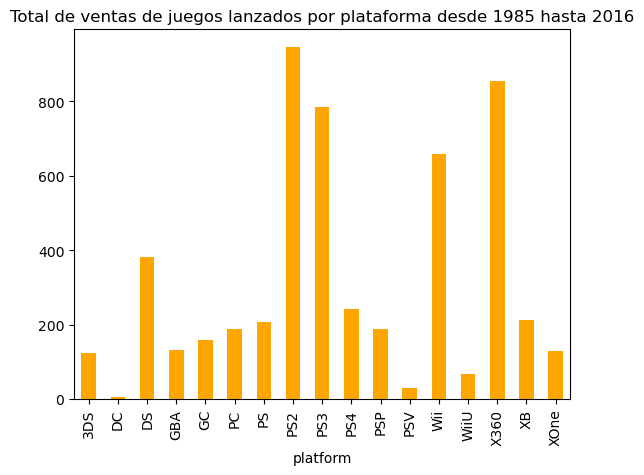

In [7]:
platform_tsales=df.groupby('platform')['total_sales'].sum() #Se sumo las ventas totales de cada plataforma para verificar como varian las ventas de una platafroma a otra
print(platform_tsales)

platform_tsales.plot(y='platform', kind='bar',color='orange',title=(f'Total de ventas de juegos lanzados por plataforma desde {year_min} hasta {year_max}'))
plt.show()


+ Las ventas de juegos en cada plataforma varia de manera desigual, tomando popularidad ciertas consolas como: PS2, Ps3, Wii y X360. Se puede destacar despues de las mencionadas a la consola DS frente a las otra consolas.

In [8]:
platform_tsales_year=df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index() #Se sumo las ventas totales de cada plataforma para verificar como varian las ventas de una platafroma a otra
platform_tsales_year['period']=platform_tsales_year['max']-platform_tsales_year['min']
print(platform_tsales_year)

   platform   min   max  period
0       3DS  2011  2016       5
1        DC  1999  2001       2
2        DS  2004  2012       8
3       GBA  2001  2006       5
4        GC  2001  2007       6
5        PC  1985  2016      31
6        PS  1994  2002       8
7       PS2  2000  2010      10
8       PS3  2006  2015       9
9       PS4  2013  2016       3
10      PSP  2004  2013       9
11      PSV  2011  2016       5
12      Wii  2006  2012       6
13     WiiU  2012  2016       4
14     X360  2005  2014       9
15       XB  2000  2007       7
16     XOne  2013  2016       3


+ Las consolas con mayor permanecia en el mercado es la PC la cual a perdurado por 31 años hasta 2016.
+ Las consolas que en relacion a la actualidad han perdido porpularidad o han desaparecido son: DC, DS, GBA, GC, PS, PS2, XB, Wii y PSP. En relacion a los dos ultimos años es decir desde 2014 los juegos para estas consolas han desaparecido.
+ El periodo de popularidad menor de una consola fue de 2 años.
+ El tiempo de duracion de una consola estimado es de entre 2 a 10 años eseptuando las vigentes como la PC

**¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.**

In [9]:
# Se crea un dataframe con los valores de 2016 para futuros calculos.
df_2016=df[df['year_of_release']==2016]

list=['3DS','PC','PS4','PSV','Wiiu','XOne']
df_analys=df[df['platform'].isin(list)]
df_analys=df_analys.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
print(df_analys)

   platform  year_of_release  total_sales
0       3DS             2011        43.73
1       3DS             2012        39.39
2       3DS             2013        15.89
3       3DS             2014        11.49
4       3DS             2015        10.55
5       3DS             2016         2.17
6        PC             1985         0.04
7        PC             1988         0.03
8        PC             1992         0.02
9        PC             1996         2.62
10       PC             1997         4.12
11       PC             1998         0.10
12       PC             1999         0.11
13       PC             2000         3.17
14       PC             2001         5.35
15       PC             2002         8.55
16       PC             2003         6.41
17       PC             2004        10.26
18       PC             2005         3.99
19       PC             2006         2.53
20       PC             2007         8.91
21       PC             2008         9.34
22       PC             2009      

+ Se puede observar que en el caso del 3DS ha venido perdiendo mercado desde su lanzamiento.
+ En el caso de PC se puede observar que ha tenido altas y bajas en el mercado pero simepre se ha mantenido en el mercado.
+ El PS4 desde su lanzamiento se puede observar que tiene una gran cantidad de ventas 
+ El PSV ha tenido una baja en ventas desde que se lanzo al mercado llehgando a ser menor de un millon en ventas.
+ El XOne ha mantenido ventas muy parecidas a las de PS4 en las dos consolas se puede observar que pese a que en el 2016 se ha visto una baja en las ventas, en los años 2014 y 2015 son muy parecidas

**Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.**

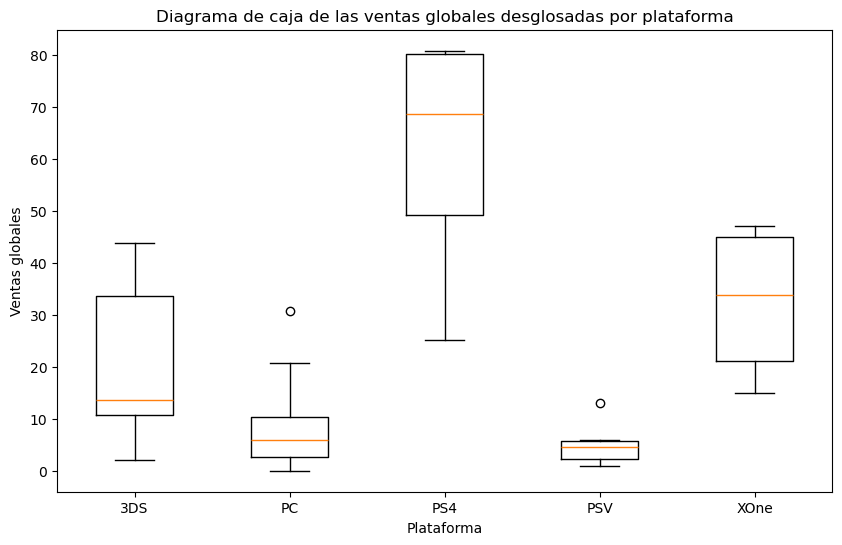

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_analys[df_analys['platform'] == platform]['total_sales'] for platform in df_analys['platform'].unique()], labels=df_analys['platform'].unique())
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.title('Diagrama de caja de las ventas globales desglosadas por plataforma')
plt.show()

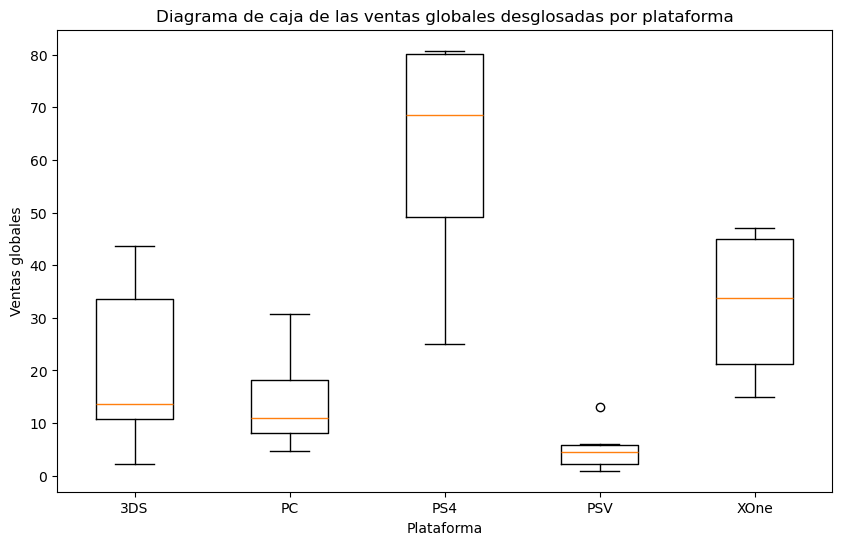

In [11]:
df_analys_5=df_analys[df_analys['year_of_release']>=2011] #Se extrae los valores de los ultimos 5 años para ver como se a comportado las ventas

plt.figure(figsize=(10, 6))
plt.boxplot([df_analys_5[df_analys_5['platform'] == platform]['total_sales'] for platform in df_analys_5['platform'].unique()], labels=df_analys_5['platform'].unique())
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.title('Diagrama de caja de las ventas globales desglosadas por plataforma')
plt.show()

+ Las diferencias de las ventas globales son significativas, cada plataforma tiene un valor promedio diferente.
+ Las ventas promedio del 3DS se encuentra por debajo de la mediana al igual que la del PC.
+ Los promedios de las consolas PSV y XOne se encuentran ubicadas mas a la mitad de sus valores maximos y minimos.
+ En cuanto a la plataforma de PS4 se encuentra el promedio por encima de la media de sus maximos y minimos.
+ La diferencia general de los promedios de las consolas se debe a su popularidad en parte lo que marca su valor minimo, al igual que el promedio de ventas se debe a las ventas que han mantenido a traves del timepo.

**Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.**


Correlación entre reseñas y ventas: 0.2375816590701726


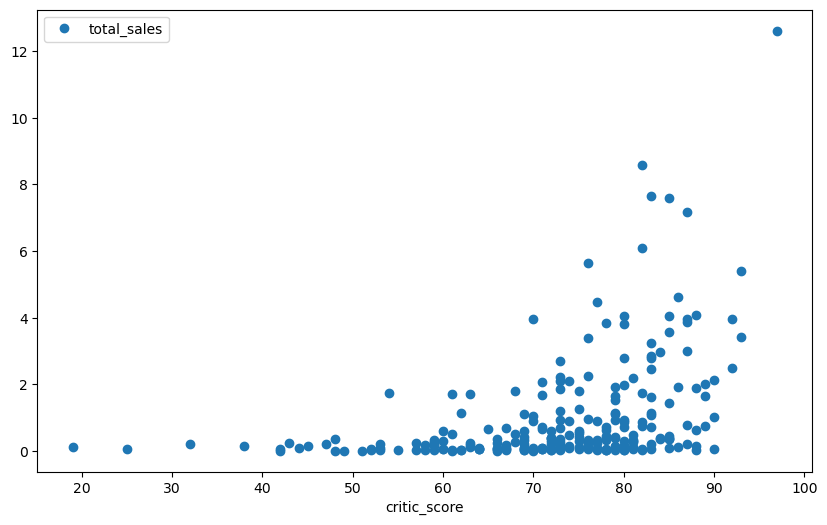

In [12]:
df_analys_ps4=df[df['platform']=='PS4'] #Se extrajo la informacion de la plataforma PS4

df_analys_ps4.plot(x='critic_score', y='total_sales', style='o', figsize=[10, 6])

correlation = df['critic_score'].corr(df['total_sales'])
print('Correlación entre reseñas y ventas:', correlation)


Correlación entre reseñas y ventas: 0.08843684122042561


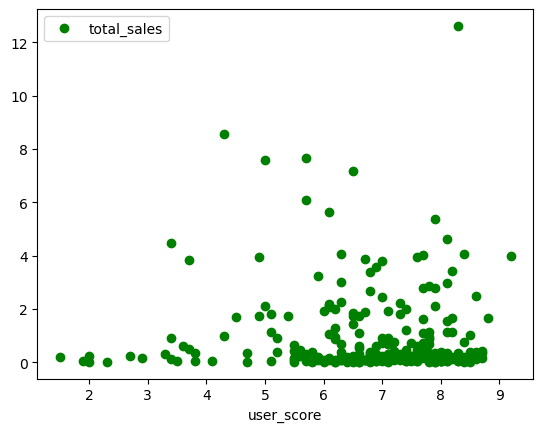

In [13]:
df_analys_ps4=df_analys_ps4.sort_values(by='user_score')
df_analys_ps4.plot(x='user_score', y='total_sales', style='o', color='green')

correlation_2 = df['user_score'].corr(df['total_sales'])
print('Correlación entre reseñas y ventas:', correlation_2)

+ Se puede observar que hay un mayor numero de ventas cuando el score del usuario supera la puntuacion de 5,5 
+ Por otro lado se observa que cuando la critica dada por profesionales es mayor de 60 se observa un amyor numero de ventas.
+ Se puede observar que el indice de correlacion es mayor cuando esta dado por las variables de critic_score y total_sales.

In [14]:
list=['3DS','PC','PS4','PSV','Wiiu','XOne']
df_analys_sales=df[df['platform'].isin(list)]
df_analys_sales_1=df.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
df_analys_sales_2=df_analys_sales_1[df_analys_sales_1['name'].duplicated()]
print(df_analys_sales_2.head(10))

                                name platform  total_sales
6             007: Quantum of Solace      PS3         1.15
7             007: Quantum of Solace      Wii         0.65
8             007: Quantum of Solace     X360         1.48
13  18 Wheeler: American Pro Trucker      PS2         0.40
15                  187: Ride or Die       XB         0.06
17               2002 FIFA World Cup      PS2         0.60
18               2002 FIFA World Cup       XB         0.19
20  2010 FIFA World Cup South Africa      PSP         0.46
21  2010 FIFA World Cup South Africa      Wii         0.43
22  2010 FIFA World Cup South Africa     X360         0.85


**Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?**


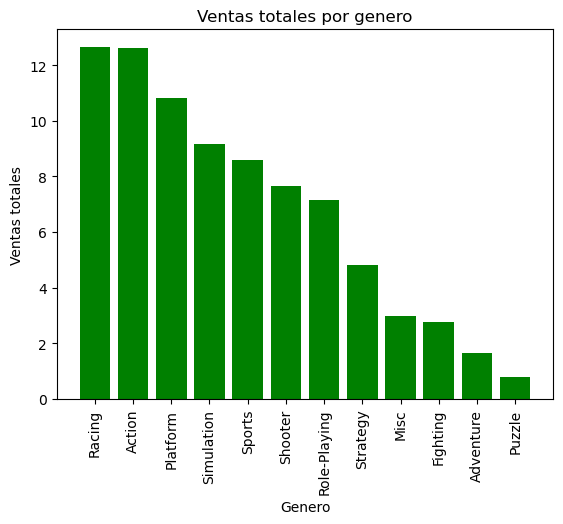

In [15]:
#Grafica de genero vs ventas totales por genero
plt.bar(df_analys_sales['genre'], df_analys_sales['total_sales'], color='green')
plt.title('Ventas totales por genero')
plt.xlabel('Genero')
plt.ylabel('Ventas totales')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()

+ Los genreos de mayor demanda son racing y action, 
+ Los que le siguen a los generos populares son platfomr, simulation. sport, shooter y role Playing. Un poco mas abajo se encuentra los de strategy.
+ Los generos menos populares son misc, fighthing, adventure y puzzle

  platform  na_sales  eu_sales  jp_sales   total
0      3DS     48.67     33.33     33.57  115.57
1       PC     63.82    104.92      0.17  168.91
2      PS4     84.16    111.78      9.29  205.23
3      PSV      9.93      8.77      7.62   26.32
4     XOne     75.58     42.02      0.29  117.89


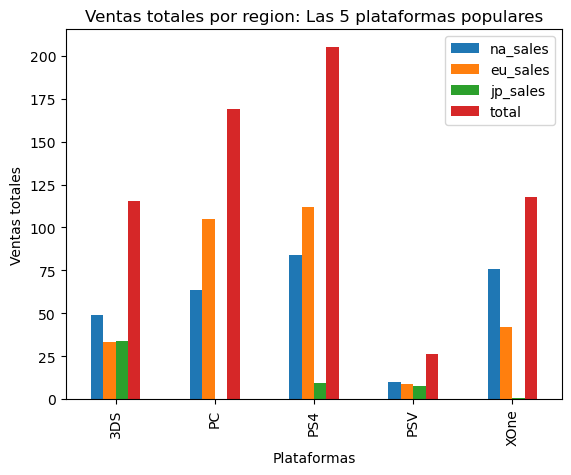

In [16]:
sales_by_platform_region = df_analys_sales.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
sales_by_platform_region['total']=sales_by_platform_region['na_sales']+ sales_by_platform_region['eu_sales']+sales_by_platform_region['jp_sales']
print(sales_by_platform_region)

#Grafica de genero vs ventas totales por genero
sales_by_platform_region.plot(x='platform',kind='bar')
plt.title('Ventas totales por region: Las 5 plataformas populares')
plt.xlabel('Plataformas')
plt.ylabel('Ventas totales')
plt.show()

+ Se puede observar que el volumen de ventas es mayor en europa en las platformas de PC y PS4.
+ Las ventas de juegos en la region japon es la menor en comparacion a las otras dos regiones.
+ Las ventas realizadas en las region de norte america se ha dado en las 5 plataformas.
+ Las 3 regiones han presentado ventas para la plataforma de 3DS
+ Las que mas han generado un volumen de ventas mayor son las plataformas de 3DS PC 
+ El orden de popularidad de las plataformas segun las ventas son: PS4, PC, 3DS, XOne y PSV

**Los cinco géneros principales. Explica la diferencia.**

           genre  na_sales  eu_sales  jp_sales   total
0         Action     67.12     71.72     11.99  150.83
1      Adventure      2.84      4.36      0.97    8.17
2       Fighting      6.35      4.27      1.41   12.03
3           Misc      7.91      4.69      2.07   14.67
4       Platform     14.41     13.08      6.42   33.91
5         Puzzle      0.83      1.20      0.75    2.78
6         Racing     12.23     17.04      3.11   32.38
7   Role-Playing     35.73     39.13     12.59   87.45
8        Shooter     68.99     62.68      2.88  134.55
9     Simulation     19.43     26.72      6.99   53.14
10        Sports     37.37     40.85      1.68   79.90
11      Strategy      8.95     15.08      0.08   24.11


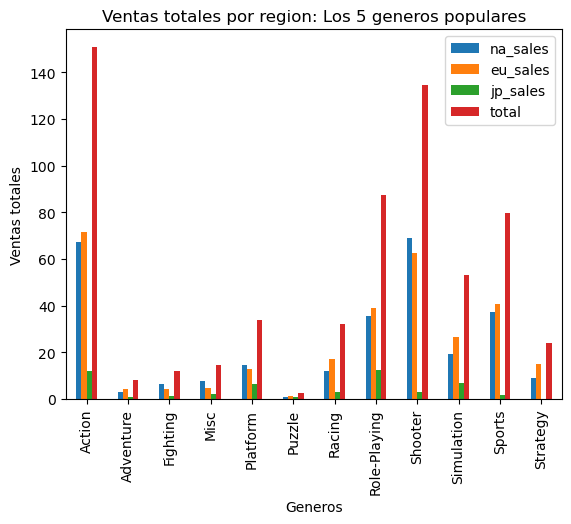

In [17]:
sales_by_genre_region = df_analys_sales.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
sales_by_genre_region['total']=sales_by_genre_region['na_sales']+ sales_by_genre_region['eu_sales']+sales_by_genre_region['jp_sales']
print(sales_by_genre_region)

#Grafica de genero vs ventas totales por genero
sales_by_genre_region.plot(x='genre',kind='bar')
plt.title('Ventas totales por region: Los 5 generos populares')
plt.xlabel('Generos')
plt.ylabel('Ventas totales')
plt.show()

+ Los 5 generos principales corresponden a: action, shooter, role-playing, sports y simulation.
+ El generoAC menos popular son los juegos de puzzle.
+ El genero con mayor ventas es el de accion.

**Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.**lt.show()

  rating  na_sales  eu_sales  jp_sales   total
0      E     64.70     74.56     22.73  161.99
1   E10+     31.44     26.02      5.37   62.83
2      M    118.12    126.13      9.08  253.33
3     RP      0.00      0.03      0.00    0.03
4      T     67.90     74.08     13.76  155.74


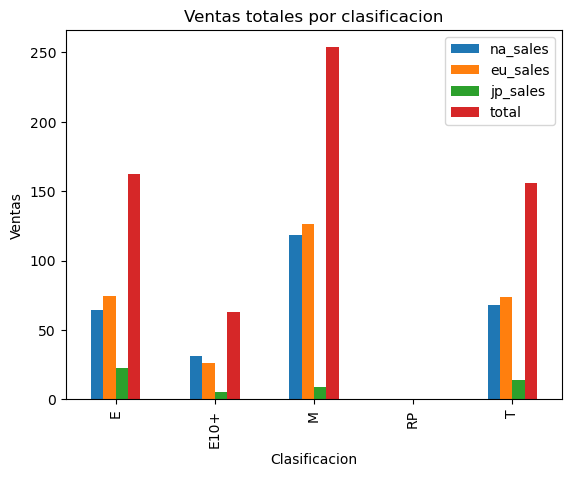

In [18]:
sales_by_rating = df_analys_sales.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
sales_by_rating['total']=sales_by_rating['na_sales']+ sales_by_rating['eu_sales']+sales_by_rating['jp_sales']

print(sales_by_rating)

#Grafica de genero vs ventas totales por genero
sales_by_rating.plot(x='rating',kind='bar')
plt.title('Ventas totales por clasificacion')
plt.xlabel('Clasificacion')
plt.ylabel('Ventas')
plt.show()

+ Los juegos mas comprados corresponden a la clasificacion dada para juegos de preadolecentes y adolescentes es decir la categoria M
+ Le sigue la categoria dada a E y T.
+ la de menor ventas son los juegos clasificados como E10+

**Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

Hipotesis Nula: No hay diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC

Hipotesis alternativa: Hay diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC

In [19]:
print(df_analys_sales.groupby('platform')['user_score'].mean().reset_index())

xone_user_score=df_analys_sales[df_analys_sales['platform']=='XOne']['user_score']
pc_user_score=df_analys_sales[df_analys_sales['platform']=='PC']['user_score']
alpha = 0.05
results = st.ttest_ind(xone_user_score,pc_user_score)# tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('valor p:', results.pvalue) # tu código: imprime el valor p obtenido)

if (results.pvalue<alpha):# tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

  platform  user_score
0      3DS    6.940645
1       PC    7.054141
2      PS4    6.739331
3      PSV    7.491525
4     XOne    6.493082
valor p: 2.4909638124872165e-05
Rechazamos la hipótesis nula


+ Si existe una diferencia significativa en el promedio de las calificaciones dadas por los usuarios de las plataformas pc y XOne

**Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**


Hipotesis Nula: No hay diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

Hipotesis alternativa: Hay una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

In [20]:
print(df_analys_sales.groupby('genre')['user_score'].mean().reset_index())

action_user_score=df_analys_sales[df_analys_sales['genre']=='Action']['user_score']
sport_user_score=df_analys_sales[df_analys_sales['genre']=='Sports']['user_score']
alpha = 0.05
results = st.ttest_ind(action_user_score,sport_user_score)# tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('valor p:', results.pvalue) # tu código: imprime el valor p obtenido)

if (results.pvalue<alpha):# tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

           genre  user_score
0         Action    6.878571
1      Adventure    7.578333
2       Fighting    6.842857
3           Misc    7.137500
4       Platform    6.928571
5         Puzzle    7.335714
6         Racing    6.764634
7   Role-Playing    7.476023
8        Shooter    6.879899
9     Simulation    6.927778
10        Sports    5.919444
11      Strategy    7.262400
valor p: 5.969563564394189e-10
Rechazamos la hipótesis nula


+ Si existe una diferencia significativa en el promedio de las calificaciones dadas por los usuarios en los generos de accion y deportes

Después de analizar los datos de ventas de videojuegos, Se ha visulizado las tendencias de la industria, como las 5 plataformas más populares, los géneros de juegos más vendidos y cómo estas tendencias han evolucionado con el tiempo. Dando como resultado que las plataformas mas populares son:ps4, xone, 3ds, pc y psv. Mientras que los generos mas vendidos son: action, shooter, role-playing, sports y simulation. Esto nos da una idea de como se ha manejado el mercado y la proyeccion que tendra en 2017.